**Exploratory Data Analysis (EDA)** is an essential initial step for data professionals to deeply understand datasets and uncover valuable insights. It involves using a diverse array of tools and techniques, with data visualization playing a pivotal role.

Through EDA, we gain a comprehensive view of data characteristics, identify relationships between variables, and formulate meaningful research questions. It serves as a powerful method to detect trends, patterns, outliers, and anomalies, paving the way for informed decision-making.

Originated by the pioneering American mathematician John Tukey in the 1970s, EDA remains indispensable today in the data exploration phase, preceding more advanced analytics and machine learning tasks.


**In this workshop, we will be exploring this concept further by conducting EDA on a dataset using Python. Aside from base Python, we shall also be making use of 4 Python modules for our EDA project:**

- **Numpy**: A core Python library for scientific computing using high-performance arrays.
- **Pandas**: A fast and powerful data analysis and manipulation tool.
- **Matplotlib**: A comprehensive library for creating visualizations in Python.
- **Seaborn**: Another data visualization library built on top of Matplotlib.

We’ll be using a dataset that contains client information for an insurance company. Each of the 10,000 rows in the dataset corresponds to a single client, with 19 variables recording a variety of client-specific information.
``


## Importing the Relevant Libraries

Before loading the dataset, we will need to first import all the relevant libraries. If you don’t have them installed already, you can do so by using the `pip install` command.


In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

We can now load the dataset into pandas using the `read_csv()` function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

## Viewing the Dataframe

We can get a quick sense of the size of our dataset by using the `shape` method. This returns a tuple with the number of rows and columns in the dataset.


In [3]:
#Return number of rows and columns
df.shape

(10000, 19)

Now let's preview the first 5 rows.



In [4]:
#Return first 5 rows of the dataset
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


Using the **info()** method, we can glean more information on the dataset including the names of the different columns and their corresponding data types as well as the number of non-null values.



In [5]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

## Preparing the Data

While our dataset does not appear to have any serious issues, we will nonetheless have to do some basic cleaning and transformation to get it ready for the main EDA task.

### Missing Values

We will start by checking the dataset for missing or null values. For this, we can use the `isna()` method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the `sum()` method.


In [6]:
#Display number missing values per column
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

We now have an idea of what data is missing and where. Typically, we have two options: delete rows that contain missing data or replace them with a value. In our case, deleting that many rows may affect our analysis, so we will go ahead and replace the values instead.

Several different methods exist for imputing missing values and what works best usually depends on the characteristics of the dataset in question as well as the objective of the analysis. One of the simplest methods is by replacing the null values in each column with the column mean or mode.

We will begin with the “credit_score” column. Since credit scores are heavily influenced by one’s income situation, it would be a better idea to impute the missing values in this column based on the mean credit score for the income group an individual belongs in. We can first run a groupby() method to see how the mean values for each income group differ.

In [7]:
#Check the mean credit score for each income group
df.groupby(by="income")["credit_score"].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

The mean credit scores for each group do differ widely as we suspected. We can go ahead and impute the missing values for the “credit_score” column using the mean credit score for each income group. The simplest way to do this would be by creating a function so we don’t have to repeat codes for each income group.

In [8]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each based on the mean credit score for          each group"""
    #iterate through each income group
    for income_class in income_classes:

        #create a subset of dataframe to use as filter
        mask = df["income"] == income_class

        #calculate the mean for the income group
        mean = df[df["income"] == income_class]["credit_score"].mean()

        #fill the missing values with mean of credit score for group
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

We can now apply our custom function to the dataframe.



In [9]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

#check for missing values
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

We no longer have any missing values in the “credit_score” column. We can now tackle the missing values in the “annual_mileage” column. This time, we will do a groupby of the “driving_experience” column and compare the means of each group in the column.



In [10]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by="driving_experience")["annual_mileage"].mean()


driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

Unlike the “credit_score” column, the mean for the different groups in the “driving_experience” do not vary too widely so we can simply impute the null values using the column mean.



In [11]:
#Calculate mean for annual_mileage column
mean_mileage = df["annual_mileage"].mean()

#Fill in null values using the column mean
df["annual_mileage"].fillna(mean_mileage,inplace=True)

#Check for null values
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

We no longer have any null values in our dataset.



### Dropping Columns

Both the `id` and `postal_code` columns will not be relevant for our analysis, so we can get rid of these using the `drop()` method. We will set the `axis` argument to 1 since we’re dealing with columns, and set the `inplace` argument to `True` to make the change permanent.


In [12]:
#Delete the id and postal_code columns
df.drop(["id","postal_code"],axis=1,inplace=True)

The data preparation section of our project is now complete, and we can shift our attention to our main task, analyzing the data.



## Analyzing the Data

With our cleansed dataset, we can go ahead and begin the task of exploring the data. While several different analyses exist for EDA, we can group them under three large umbrellas: univariate analysis, bivariate analysis, and multivariate analysis. We will look at each one of these in turn.


### Univariate Analysis

Univariate analysis is the simplest form of analyzing data. As the name implies, it deals with analyzing data within a single column or variable and is mostly used to describe data. There are different kinds of univariate analyses.

**Categorical Unordered**: This type of data has no order or ranking and is categorical as opposed to numerical. Our `gender` column contains two sub-categories that describe whether a client is male or female. We can get a count of each category by using the `value_counts()` method.


In [13]:
#Check the count for each category in the "gender" column
df["gender"].value_counts()

gender
female    5010
male      4990
Name: count, dtype: int64

Better yet, we can visualize this information using a countplot from Seaborn.



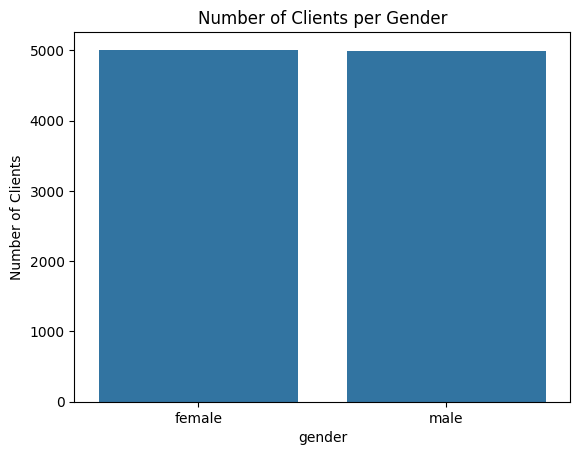

In [14]:
#Create a countplot to visualize the count of each category in the gender column.
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

**Categorical ordered**: This type of data has a natural rank and progression. Examples from our dataset include “education” and “income”. Let’s explore the income variable using a pie chart.

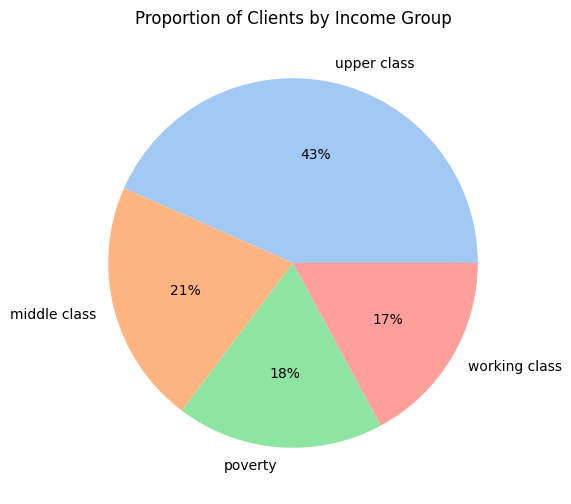

In [39]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["income"].value_counts(normalize=True)

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

The largest category is “upper class”, representing 43% of the total, followed by “middle class” (21%), poverty (18%), and “working class” (17%). Now let’s explore the “education” variable using a countplot.



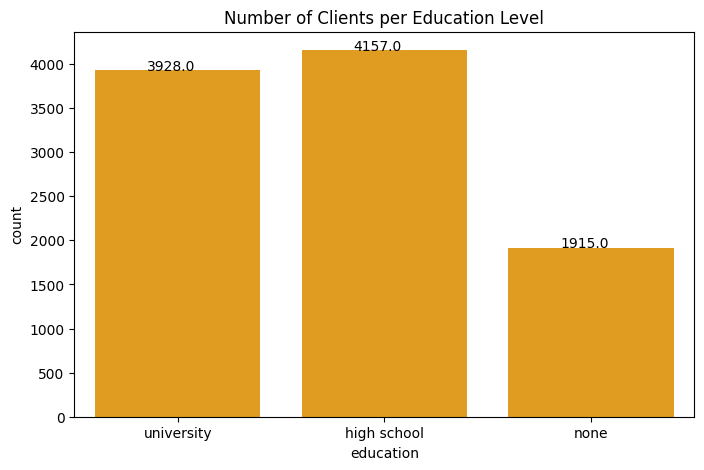

In [41]:
#Create a countplot to visualize the count of each category in the education column
plt.figure(figsize=[8,5])
ax = sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Number of Clients per Education Level")
plt.show()


There are more clients with a high school education than any other category, followed by university graduates and then clients with no education.

**Numeric**: The third type of univariate analysis uses numerical data. Univariate numeric data is usually analyzed by calculating functions like the mean, mode, max, min, standard deviation etc. One easy way to get these summary statistics on a numerical column is by using the describe() method. Let’s try this on the “credit_score” column.



In [17]:
#Return summary statistics for the "credit_score" column
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

This is great information, but it doesn’t tell us how the data is distributed. A histogram is a great way to visualize the frequency distribution of numerical data. We can plot one using the histplot() function in Seaborn.



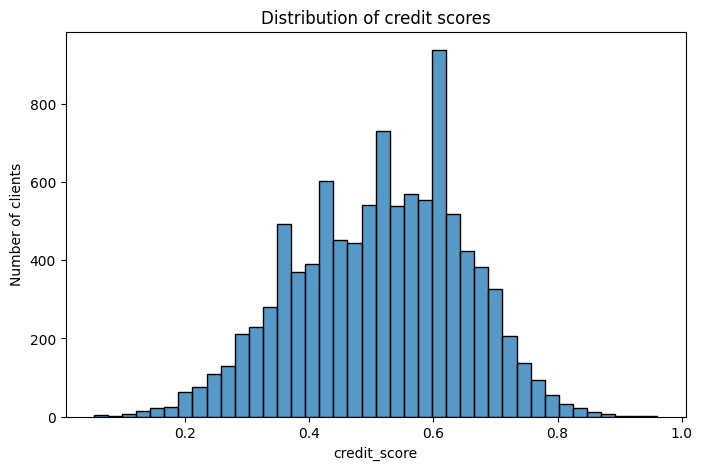

In [18]:
#Plot a histogram using the "credit_score" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="credit_score",bins=40).set(title="Distribution of credit scores",ylabel="Number of clients")
plt.show()

The “credit_score” column follows a normal distribution or bell curve. Let’s create another histogram for the “annual_mileage” column, but this time we will include a kernel density estimation (kde) to show smoothness or continuity.



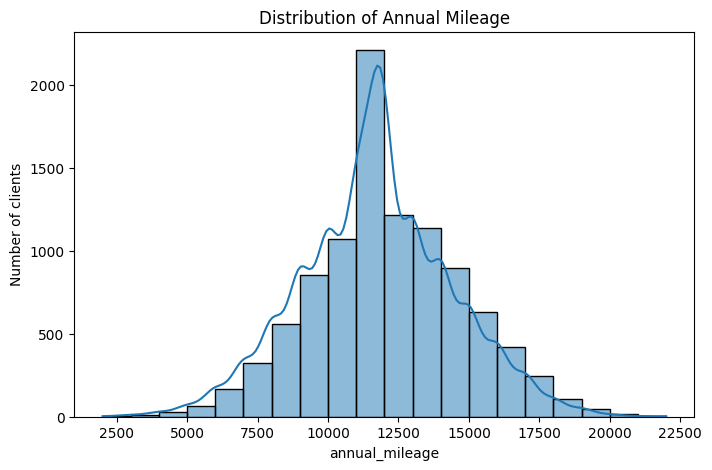

In [19]:
#Plot a histogram using the "annual_mileage" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="annual_mileage",bins=20,kde=True).set(title="Distribution of Annual Mileage",ylabel="Number of clients")
plt.show()

Another bell curve, confirming that data near the mean are more frequent in occurrence than data far from the mean.



### Bivariate analysis
Bivariate analysis involves analyzing data with two variables or columns. This is usually a way to explore the relationships between these variables and how they influence each other, if at all. A bivariate analysis could take one of three different forms: numeric-numeric, numeric-categorical and categorical-categorical.



**Numeric-Numeric**: Scatter plots are a common way to compare two numeric variables. Let’s investigate the relationship between “annual_mileage” and “speeding_violations”.



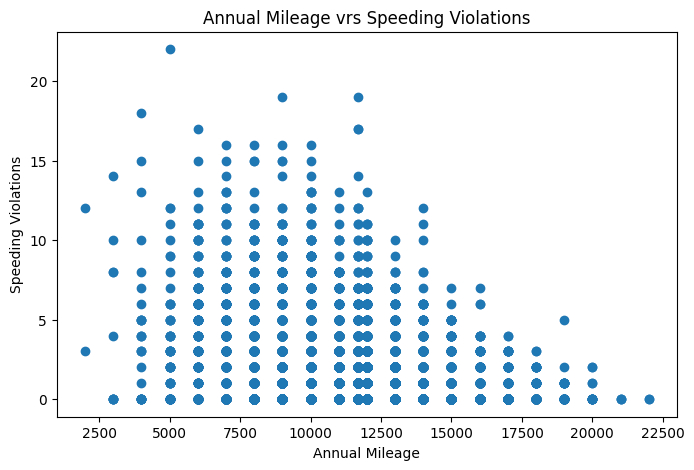

In [20]:
#Create a scatter plot to. show relationship between "annual_mileage" and "speeding_violations"
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
plt.title("Annual Mileage vrs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()

From the graph, we can infer a negative correlation between annual mileage and the number of speeding violations. This means the more miles a client drives per year, the fewer speeding violations they commit.



We could also use a correlation matrix to get more specific information about the relationship between these two variables. A correlation matrix is useful for identifying the relationship between several variables. As an example, let’s create a matrix using the”speeding_violations”, DUIs”, and “past_accidents” columns.

In [21]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


All our variables exhibit a positive correlation with each other, meaning when one goes up the other goes up as well and vice-versa. But how do we interpret the strength of this relationship? Generally speaking, a correlation coefficient between 0.5 and 0.7 indicates variables that can be considered moderately correlated, while a correlation coefficient whose magnitude is between 0.3 and 0.5 indicates variables that exhibit weak correlation, as is the case with most of our variables. This means a moderate, positive correlation exists between the number of past accidents and speeding violations, while a weak, positive correlation exists between the number of past accidents and DUIs.

The best way to visualize correlation however, is with a heatmap. We can easily create one by passing the correlation matrix into the heatmap() function in Seaborn.



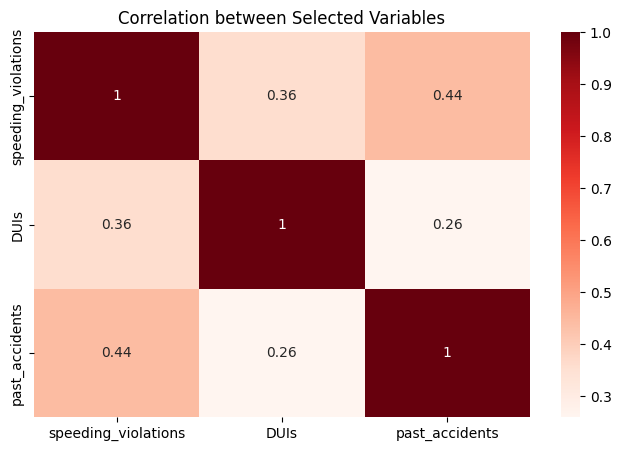

In [22]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

**Numeric-Categorical**: Here, we analyze data using one set of numeric variables and another set of categorical variables. Analysis can be done by using the mean and median as in the example below. We first group by “outcome” and then calculate the mean “annual_mileage” for each group.



In [23]:
#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

Using this method, we could return the minimum, maximum, or median annual mileage for each category by using the min(), max(), and median() methods respectively. However, we can better visualize the difference in dispersion or variability between two variables by using box plots. Box plots display a five-number summary of a set of data; the minimum, first quartile, median, third quartile, and maximum.



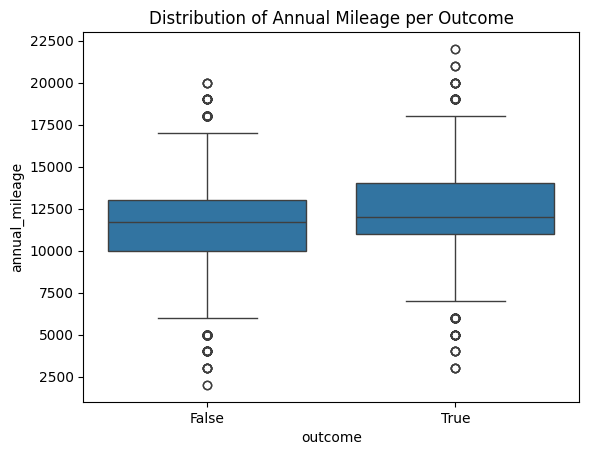

In [24]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='outcome', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

Both variables have similar medians (denoted by the middle line that runs through the box) though clients who made a claim have slightly higher median annual mileage than clients who didn’t. The same can be said for the first and third quartiles (denoted by the lower and upper borders of the box respectively).



Similarly, we can compare the distributions of the two categories in “outcome” based on their credit scores, but this time we’ll make use of a bivariate histogram by setting the “hue” argument in the histplot() function to “outcome”.



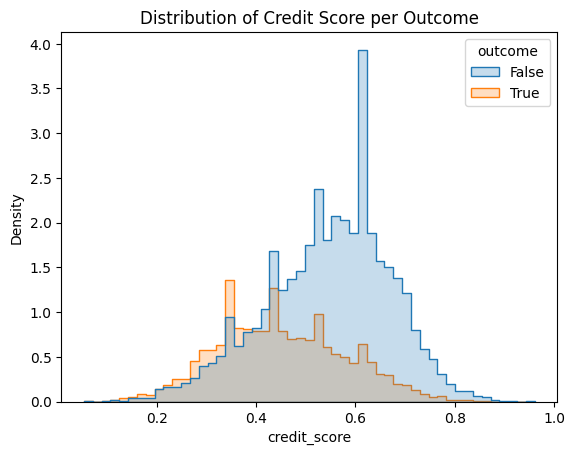

In [25]:
#Create histograms to compare distribution
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

**Categorical-Categorical**: As you may have guessed by now, this involves a set of two categorical variables. As an example, we will explore how the “outcome” variable relates to categories like age and vehicle year. To begin, we will convert the labels in the outcome column from True and False to 1s and 0s respectively. This will allow us to calculate the claim rate for any group of clients.



In [26]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

claim_rate
0    6867
1    3133
Name: count, dtype: int64

Half as many clients made a claim in the past year compared to those who didn’t. Now let’s check how the claim rate is distributed between the different categories of age.



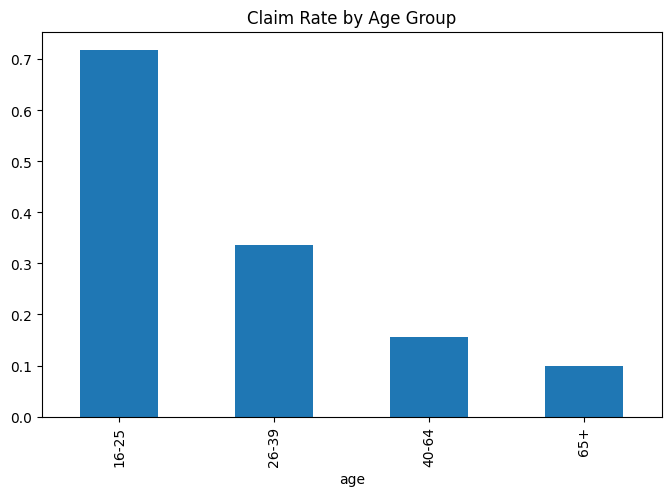

In [27]:
#Plot the average claim rate per age group
plt.figure(figsize=[8,5])
df.groupby('age')['claim_rate'].mean().plot(kind="bar")
plt.title("Claim Rate by Age Group")
plt.show()

From the above, it is clear that younger people are more likely to make an insurance claim. We can do the same for “vehicle_year”.



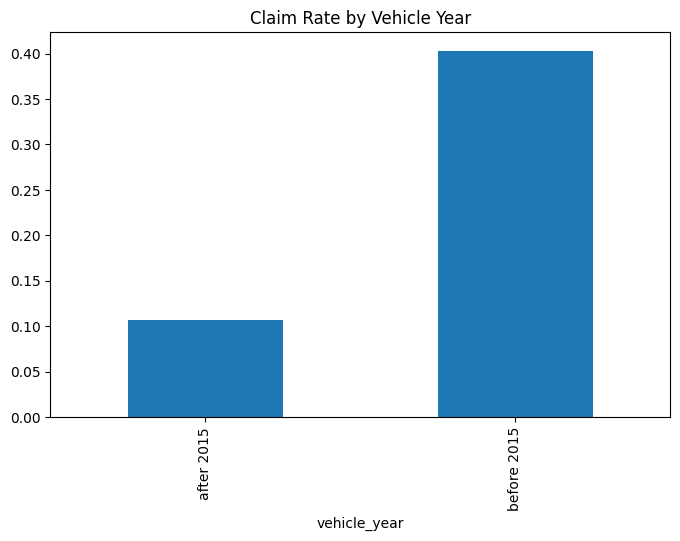

In [28]:
#Plot the average claim rate per vehicle year category
plt.figure(figsize=[8,5])
df.groupby('vehicle_year')['claim_rate'].mean().plot(kind="bar")
plt.title("Claim Rate by Vehicle Year")
plt.show()

Clients with older vehicles are much more likely to file a claim. Another way to visualize the claim rate is by using probability bar charts.



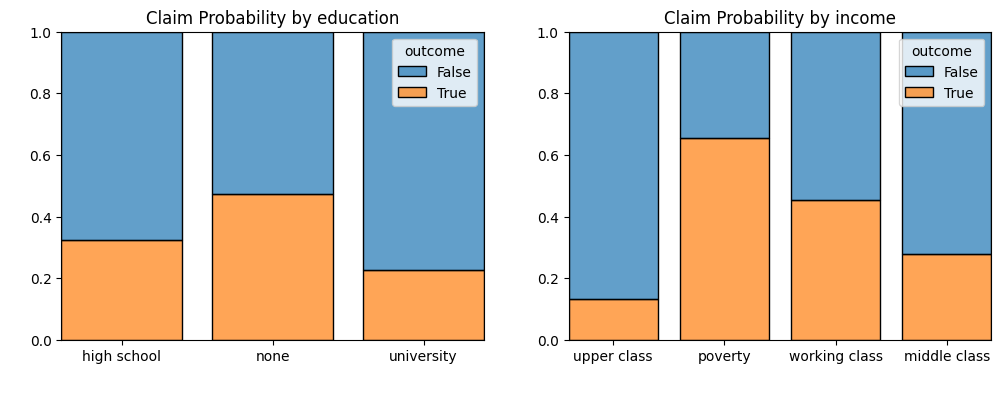

In [29]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two probability graphs for education and income
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")

Clients with no education are more likely to file a claim compared to high school and university graduates, while clients in the “poverty” income group are more likely to file a claim, followed by clients in the “working class” and “middle class” categories, in that order.



### Multivariate analysis
This comprises data analysis involving more than two variables. A common type of multivariate analysis is the heatmap. Heatmaps provide a fast and simple way for visual recognition of patterns and trends. We can easily check the relationship between variables in our data set like “education” and “income” by using a third variable, claim rate. First, we will create a pivot table.

In [30]:
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


We can then pass in our pivot table to the heatmap() function in Seaborn.



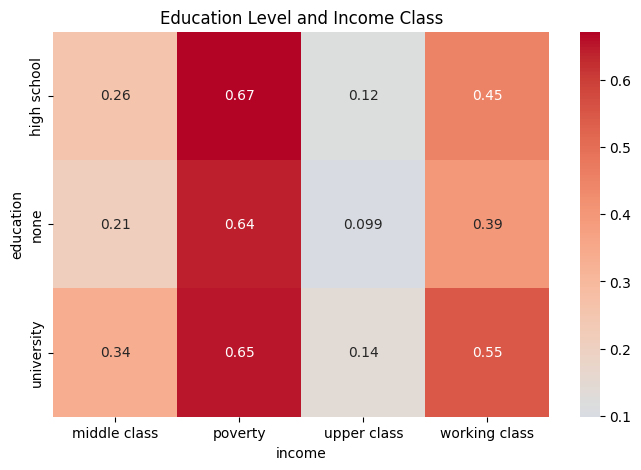

In [31]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title("Education Level and Income Class")
plt.show()

High school graduates in the poverty income class have the highest claim rate, followed by university graduates in the poverty income class. Clients in the upper class income category with no education have the lowest claim rates.



Let’s do the same for driving experience and marital status.



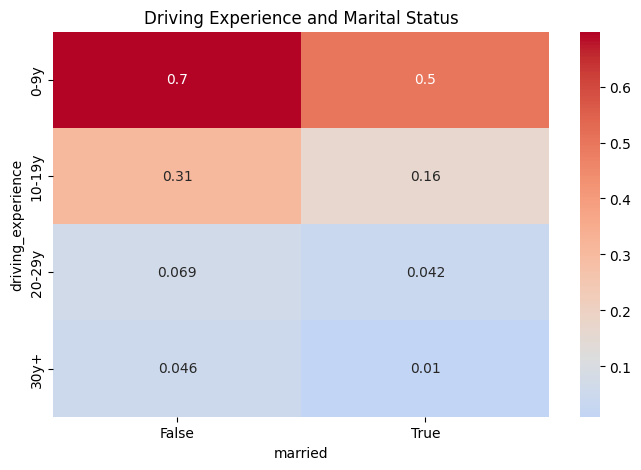

In [32]:
#Create pivot table for driving experience and marital status with average claim rate as values
driv_married = pd.pivot_table(data=df,index='driving_experience',columns='married',values='claim_rate')

#Create a heatmap to visualize driving experience, marital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(driv_married,annot=True,cmap='coolwarm', center=0.117)
plt.title("Driving Experience and Marital Status")
plt.show()

Unmarried individuals with 0–9 years of driving experience are the most likely to file a claim, while married individuals with 30+ years of driving experience are the least likely to file a claim.



Finally, let’s create a heatmap to visualize gender, family status, and claim rate.



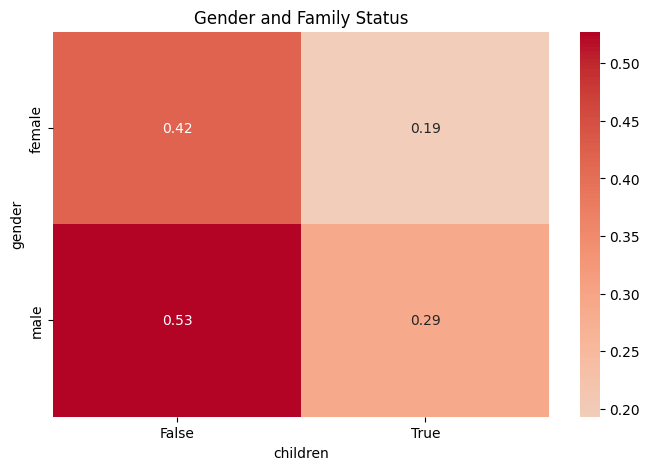

In [33]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")
plt.show()

Men without children are the most likely to make a claim while women with children are the least likely to make a claim.



## Conclusion
In this workshop, we have explored the basics of EDA by conducting univariate, bivariate, and multivariate analyses on a dataset. I hope that I was able to clearly illustrate the kinds of issues to tackle, the types of visualizations to create, and the various analyses to do while exploring a dataset. Most important of all, I hope that you have gained some new skills from reading or following along with this article. Thank you very much for sticking around to the end, and if there is anything you need further clarification on, please don’t hesitate to leave a comment. All the best in your data journey!